<a href="https://colab.research.google.com/github/Charles-OBert/Recidivism/blob/main/Recidivism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Systemic Nature of Recidivism**

Charles O'Bert and Cameron McLaren

https://charles-obert.github.io/Recidivism/Recidivism.html

**Project Goals**

The goal of this project is to understand the systemic factors that lead to increased recidivism rates:

1.   How does education level affect one's chances of reincarceration?
2.   How does employment level affect one's chances of reincarceration?
3.   What other factors contribute to recidivism rate?

Our hypothesis is that due to the way the prison system is structured, people with lower employment and education levels are more likely to face reincarceration given that more marginalized individuals are at higher risk for facing violence at the hands of the state.

**Collaboration Plan**

Our plan is to meet biweekly over Zoom in order to break down the deliverables for each milestone. We will go through each piece of the assignment and work on some pieces collaboratively and delegate other pieces accordingly. We plan to use Google Colab for the coding bits, and then we will import it into Jupyter Notebooks in order to submit it.

**Data Set Description:**

https://data.ojp.usdoj.gov/Courts/NIJ-s-Recidivism-Challenge-Full-Dataset/ynf5-u8nk/about_data

Georgia gives documentation for individuals who have been reincarcerated and various pieces of information about them, including education level, race, gender, age, employment, and sentence lengths.

In [ ]:
# ETL: get and turn into tidy data
import pandas as pd
!git clone https://github.com/Charles-OBert/Recidivism.git
rec = pd.read_csv('Recidivism/Recidivism.csv') # read the 'csv' file
rec.dropna(inplace=True) # gets rid of any entries with NaN in them
rec.head()

fatal: destination path 'Recidivism' already exists and is not an empty directory.


,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
# Get rid of unnecessary columns
rec.drop(rec.columns[50:53], axis=1, inplace=True)
rec.drop(rec.columns[47:48], axis=1, inplace=True)
rec.drop(rec.columns[28:46], axis=1, inplace=True)
rec.drop(rec.columns[0:8], axis=1, inplace=True)
rec.drop(columns=['Dependents','Prison_Years','Training_Sample'],inplace=True)

Let's see what we have left.

In [ ]:
rec.dtypes

Education_Level                                       object
Prison_Offense                                        object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Drug                            object
Prior_Arrest_Episodes_PPViolationCharges              object
Prior_Arrest_Episodes_DVCharges                         bool
Prior_Arrest_Episodes_GunCharges                        bool
Prior_Conviction_Episodes_Felony                      object
Prior_Conviction_Episodes_Misd                        object
Prior_Conviction_Episodes_Viol                          bool
Prior_Conviction_Episodes_Prop                        object
Prior_Conviction_Episodes_Drug                        object
Prior_Conviction_Episodes_PPViolationCharges            bool
Prior_Conviction_Episode

Clearly a lot of these columns do not have an accurate dtype. Let's fix that.

In [ ]:
# We changed all of the columns with bool values into int values to make it easier for ml later

for column in rec.columns:
  if rec[column].dtypes == bool:
    rec[column] = rec[column].astype(int)

# Assign range of numerical values to an arbitrary number that makes it distinguishable from other data
category_mappings = {'2 or more': 200,'3 or more': 300,  '4 or more': 400, '5 or more': 500, '6 or more': 600, '10 or more': 1000}

# Iterate through columns
for col in rec.columns:
    if rec[col].dtype == 'object':
        for category, value in category_mappings.items():
            if category in rec[col].unique():
                rec[col] = rec[col].replace(category, value).astype(int)

Now the dtypes are much more accurate.

In [ ]:
rec.dtypes

Education_Level                                       object
Prison_Offense                                        object
Prior_Arrest_Episodes_Felony                           int64
Prior_Arrest_Episodes_Misd                             int64
Prior_Arrest_Episodes_Violent                          int64
Prior_Arrest_Episodes_Property                         int64
Prior_Arrest_Episodes_Drug                             int64
Prior_Arrest_Episodes_PPViolationCharges               int64
Prior_Arrest_Episodes_DVCharges                        int64
Prior_Arrest_Episodes_GunCharges                       int64
Prior_Conviction_Episodes_Felony                       int64
Prior_Conviction_Episodes_Misd                         int64
Prior_Conviction_Episodes_Viol                         int64
Prior_Conviction_Episodes_Prop                         int64
Prior_Conviction_Episodes_Drug                         int64
Prior_Conviction_Episodes_PPViolationCharges           int64
Prior_Conviction_Episode

**Exploratory Data Analysis**

**Education**

We have a categorical variable called Education Level. Let's see its frequency of values.

In [ ]:
rec['Education_Level'].value_counts()

Education_Level
High School Diploma      6366
Less than HS diploma     5638
At least some college    2166
Name: count, dtype: int64

Knowing that we have three levels for education, let's try to see if there is any correlation between level of education and recidivism.

In [ ]:
Educ_corr = pd.get_dummies(rec["Education_Level"]).astype(int) #Create new dataframe with three binary numeric variables for education
Educ_corr['Recidivism_Within_3years']=rec["Recidivism_Within_3years"] #added recidivism binary variable
Educ_corr.corr() #Create correlation matrix

,At least some college,High School Diploma,Less than HS diploma,Recidivism_Within_3years
At least some college,1.000000,-0.383655,-0.345305,-0.104457
High School Diploma,-0.383655,1.000000,-0.734196,0.041867
Less than HS diploma,-0.345305,-0.734196,1.000000,0.034249
Recidivism_Within_3years,-0.104457,0.041867,0.034249,1.000000


It's interesting that High School Diploma has a higher correlation with recidivism than less than HS diploma. This might be something to look at further.

**Employment**

Let's take a look at distribution of values for the time in days of being employed after parole (%).

In [ ]:
rec['Percent_Days_Employed'].describe()

count    14170.000000
mean         0.525187
std          0.414983
min          0.000000
25%          0.000000
50%          0.592486
75%          0.980211
max          1.000000
Name: Percent_Days_Employed, dtype: float64

It seems to follow a rather normal distribution with the median being around 50%. Let's visualize it to confirm.

<Axes: ylabel='Frequency'>

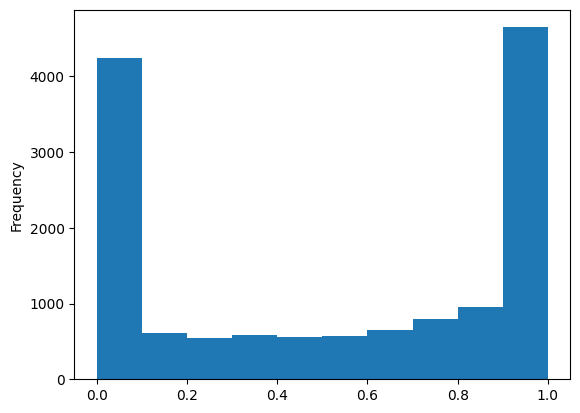

In [ ]:
rec["Percent_Days_Employed"].plot.hist()

It looks like the majority has been either fully employed or fully unemployed during their parole. It has a U-shape distribution.

**Criminal Offense**

Let's take a look at what people were reincarcerated for.

<Axes: xlabel='Prison_Offense'>

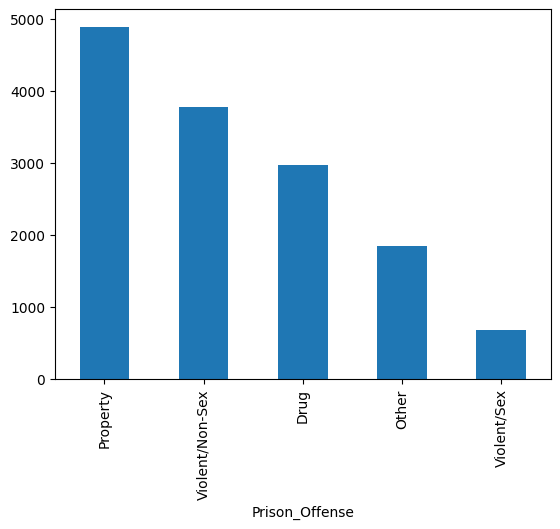

In [ ]:
rec['Prison_Offense'].value_counts().plot.bar()

**Model Ideas**

The following two model ideas come to mind:


*   KNN classifier model where we guess whether or not someone will be reincarcerated after their initial release from prison.
*   Logistic regression for binary classification (in our case if someone will be reincarcerated within 3 years of their initial release).

The independent variable will be Education, Employment, and Prison Offense. The dependent variable will be recidivism. To measure accuracy we will check if the predicted y value is the same as the actual y variable and get the score.

